In [1]:
using Plots, LaTeXStrings, SpecialFunctions, Random,Distributions, Interpolations, Dierckx, NLopt, ForwardDiff
using LinearAlgebra,StatsBase
gr(); #Load packages

In [2]:
function Stochastic(LX,LY,t1,A0,PM)  #Stochastic model
T=Int(t1)
Q=Int(sum(A0));
pos = [(0, 0) for _ in 1:Q]
pos0 = [(0, 0) for _ in 1:Q]

NumAgent= zeros(LX)    
    
count = 0
for i in 1:LX
    for j in 1:LY
        if A0[i,j] > 0
        count += 1
        pos0[count] = (i,j)
        pos[count]=(i,j)
        end
    end
end

    
for kk in 1:T
Q = length(pos)
count = 0

    while count < Q
        # Choose a random particle to move
        idx = rand(1:Q)
        count = count + 1
        xx, yy = pos[idx]

        # Choose a direction: 1=up, 2=down, 3=left, 4=right
        dir = rand(1:4)
        R=rand(1)
        if dir == 1 && yy < LY && yy >  1 &&  R[1] <= PM
            yy += 1
        elseif dir == 2 && yy < LY && yy >  1 &&  R[1] <= PM
            yy -= 1
        elseif dir == 3 && yy < LY && yy >  1 &&  R[1] <= PM
            xx -= 1
        elseif dir == 4 && yy < LY && yy >  1 &&  R[1] <= PM
            xx += 1
        end

        
        if dir == 1 && yy == LY  &&  R[1] <= PM
            yy += 0
        elseif dir == 2 && yy == LY  &&  R[1] <= PM
            yy -= 1
        elseif dir == 3  && yy == LY  &&  R[1] <= PM
            xx -= 1
        elseif dir == 4 && yy == LY  &&  R[1] <= PM 
            xx += 1
        end

        if dir == 1 && yy == 1 &&  R[1] <= PM
            yy += 1
        elseif dir == 2  && yy == 1 &&  R[1] <= PM
            yy -= 0
        elseif dir == 3  && yy == 1 &&  R[1] <= PM
            xx -= 1
        elseif dir == 4  && yy == 1 &&  R[1] <= PM
            xx += 1
        end
            
        
        pos[idx] = (xx, yy)

    end


end




for i in 1:Q
NumAgent[pos[i][1]] = NumAgent[pos[i][1]] + 1    
end

return NumAgent,pos0,pos
end

Stochastic (generic function with 1 method)

In [3]:
LX=200 #Stochastic simulation and surrogate model problem definitions
LY=50
PM=1.0
D=PM/4
T=100.0
U0=0.5
h=25 

A0=zeros(LX,LY)
xxloc=zeros(LX)
yyloc=zeros(LY)
for i in 1:LX
    xxloc[i]=-LX/2+(i-1)
    for j in 1:LY
    R=rand()
    yyloc[j]=0+(j-1)
        if abs(xxloc[i]) <= h && R <= U0
        A0[i,j]=1.0
        end
    end
end
Q=Int(sum(A0));

In [5]:
@time (data,pos0,pos)=Stochastic(LX,LY,T,A0,PM); #Calls the stochastic model, data below is the output used for reproducibility

data = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 6.0, 1.0, 6.0, 7.0, 5.0, 8.0, 10.0, 4.0, 7.0, 19.0, 11.0, 11.0, 10.0, 19.0, 
    28.0, 19.0, 19.0, 13.0, 23.0, 32.0, 26.0, 23.0, 14.0, 23.0, 15.0, 21.0, 34.0, 19.0, 23.0, 34.0, 28.0, 28.0, 22.0, 23.0, 23.0, 39.0, 19.0, 
    35.0, 25.0, 35.0, 23.0, 20.0, 22.0, 23.0, 20.0, 25.0, 22.0, 24.0, 23.0, 17.0, 26.0, 23.0, 20.0, 27.0, 21.0, 22.0, 26.0, 21.0, 14.0, 12.0,
    7.0, 15.0, 7.0, 11.0, 8.0, 9.0, 2.0, 7.0, 6.0, 4.0, 1.0, 2.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 
    0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0];

  0.027963 seconds (125.01 k allocations: 7.670 MiB)


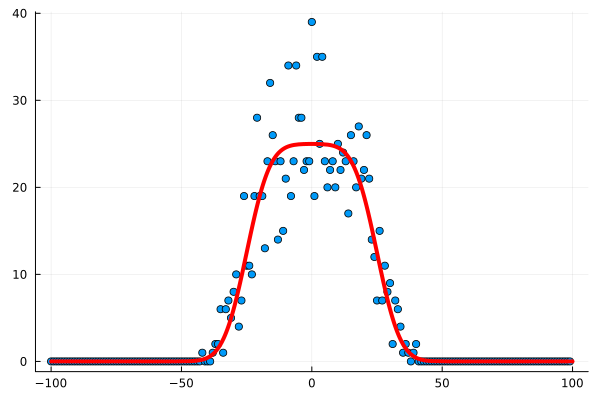

In [12]:
ue(x) = LY*U0*(erf((h-x)/sqrt(4*D*T))+erf((h+x)/sqrt(4*D*T)))/2;
p1 = scatter(xxloc,data,label=false)
p1 = plot!(ue,-LX/2,LX/2,lc=:red,lw=4,label=false) #Create simple plot to compare stochastic simulation data and PDE solution

In [13]:
NumAgent0=zeros(length(xxloc))
NumAgent=zeros(length(xxloc))
for i in 1:Q
NumAgent0[pos0[i][1]] = NumAgent0[pos0[i][1]] + 1
NumAgent[pos[i][1]] = NumAgent[pos[i][1]] + 1
end

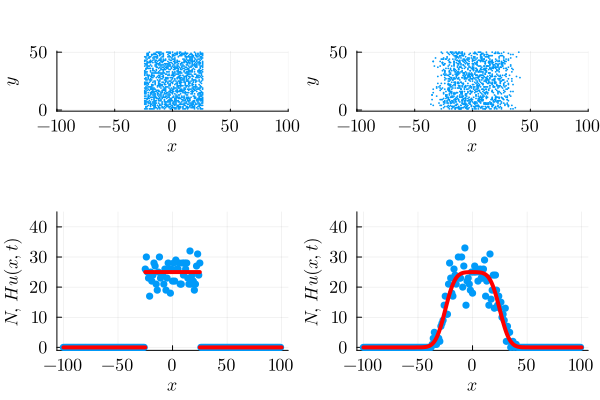

In [14]:
p1 = scatter(pos0[1:end],ms=1,msc=:auto)
p1 = plot!(ylims=(-1,51),xlims=(0,LX), aspect_ratio=:equal,legend=false)
p1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p1=plot!(xticks=([0, 50, 100, 150, 200],[L"-100", L"-50", L"0", L"50", L"100"]))
p1=plot!(yticks=([0, 50],[L"0",L"50"]))
p1=plot!(xlabel=L"x",ylabel=L"y")
#display(p1)

p2 = scatter(pos[1:end],ms=1,msc=:auto)
p2 = plot!(ylims=(-1,51),xlims=(0,LX), aspect_ratio=:equal,legend=false)
p2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p2=plot!(xticks=([0, 50, 100, 150, 200],[L"-100", L"-50", L"0", L"50", L"100"]))
p2=plot!(yticks=([0, 50],[L"0",L"50"]))
p2=plot!(xlabel=L"x",ylabel=L"y")
#display(p2)

p3 = scatter(xxloc,NumAgent0,label=false,msc=:auto)
f(x)=LY*U0;
g(x)=0.0;
p3=plot!(f,-h,h,lw=4,lc=:red,label=false)
p3=plot!(g,-LX/2,-h,lw=4,lc=:red,label=false)
p3=plot!(g,h,LX/2,lw=4,lc=:red,label=false)
p3=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p3=plot!(xticks=([-100, -50, 0, 50, 100],[L"-100", L"-50", L"0", L"50", L"100"]))
p3=plot!(yticks=([0, 10, 20, 30, 40],[L"0", L"10", L"20", L"30", L"40"]))
p3=plot!(ylims=(-1,45))
p3=plot!(xlabel=L"x",ylabel=L"N, \, H u(x,t)")


p4 = scatter(xxloc,NumAgent,label=false,msc=:auto)
p4 = plot!(ue,-LX/2,LX/2,lc=:red,lw=4,label=false)
p4=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
p4=plot!(xticks=([-100, -50, 0, 50, 100],[L"-100", L"-50", L"0", L"50", L"100"]))
p4=plot!(yticks=([0, 10, 20, 30, 40],[L"0", L"10", L"20", L"30", L"40"]))
p4=plot!(ylims=(-1,45))
p4=plot!(xlabel=L"x",ylabel=L"N, \, H u(x,t)")

p5=plot(p1,p2,p3,p4,layout=(2,2))
#savefig(p5,"Figure1.pdf") 
display(p5) #This creates Figure 1(c)-(f)

In [15]:
M = 100000 #Samples for ABC rejection with the surrogate PDE model
Umin, Umax = 0.30, 0.70
Dmin, Dmax = 0.05, 0.40
Usampled = rand(Uniform(Umin, Umax), M)
Dsampled = rand(Uniform(Dmin, Dmax), M)
dis = zeros(M)
ue(x, U, D) = LY * U * (erf((h - x)/sqrt(4 * D * T)) + erf((h + x)/sqrt(4 * D * T))) / 2

for m in 1:M
    datasample = ((x) -> ue(x, Usampled[m], Dsampled[m])).(xxloc)
    dis[m] = norm(datasample - data)
    if mod(m, 10000) == 0
        println("sample: ", m)
    end
end

sample: 10000
sample: 20000
sample: 30000
sample: 40000
sample: 50000
sample: 60000
sample: 70000
sample: 80000
sample: 90000
sample: 100000


In [16]:
#idxs = partialsortperm(dis, 1:1000); # Indices of the 1000 smallest elements
#smallD = Dsampled[idxs];
#smallU = Usampled[idxs];
#Below, samples of smallest U and D for reproducibility
smallU = [0.5144448156389548, 0.5139409391810599, 0.5138992958058528, 0.5147451006554323, 0.5141197064927425, 0.5136900599383742, 0.513711841971532, 0.5135614323426372, 0.5142247161628491, 0.5139941396779828, 0.5153025699903676, 0.515355149965883, 0.5138452343684422, 0.5128979043909495, 0.5137255282376181, 0.515224226592359, 0.5129719274517984, 0.5129317858355695, 0.5149805443365292, 0.5132310870041941, 0.5150340606055352, 0.5125803912746181, 0.5125718146090226, 0.515849727301121, 0.5130152550617025, 0.513217444966208, 0.5136683922911693, 0.5159534688728165, 0.5149419053603217, 0.5124078574232006, 0.5123287604902762, 0.5128817760262867, 0.5147105117354315, 0.5162686400686101, 0.5158016121808382, 0.5163009855298614, 0.512314203388973, 0.5138273867296289, 0.5125023104732189, 0.5125990755309884, 0.5163669980496002, 0.51518603004851, 0.5123724634164903, 0.5164432246605426, 0.5130511251401382, 0.514387331602091, 0.5131145486762272, 0.5155075010401736, 0.5129361323848568, 0.5157418397156224, 0.5134497095566859, 0.5124199084986109, 0.5139285225617453, 0.5123978753952025, 0.5164677802283187, 0.5147282582861863, 0.5128373726739042, 0.5120063908639805, 0.5131279192289792, 0.5164886279186025, 0.5118164755084043, 0.5136582904449312, 0.5147256401718898, 0.512131983439487, 0.5133827229137368, 0.514570789903869, 0.5145768364124973, 0.5168526998134637, 0.5166354487862469, 0.5160356842750292, 0.5125895303361732, 0.51226487388937, 0.5148825069310383, 0.5156291370535551, 0.5129561438915125, 0.5118472360928521, 0.5121277321569, 0.5120948674527905, 0.5144237323273768, 0.5140317883438676, 0.5144447812536544, 0.5115423093923144, 0.5116131569763379, 0.5117899907230442, 0.5129164554189407, 0.5144173292387849, 0.5126734662270906, 0.5114611659005083, 0.5151676523388988, 0.514641462802834, 0.5156653687093502, 0.5133534402019456, 0.5118846826028396, 0.5117267854016412, 0.5150386047735958, 0.5124062511382457, 0.5163824214314968, 0.5127753388596394, 0.515768457508941, 0.5124071522935714, 0.5151978683201648, 0.5147105218728181, 0.5146326783195536, 0.5115215224377591, 0.5111836232461636, 0.5166675500164493, 0.5153853862099205, 0.5174598289592249, 0.5159121908383018, 0.5122060203084559, 0.517443353644981, 0.5154746069997957, 0.5113884669414923, 0.5112364001725627, 0.5170566062409867, 0.5117338538543781, 0.5171712938528344, 0.5120876311702679, 0.5125408147773038, 0.5122324110008897, 0.5110071678645896, 0.5174084430515189, 0.5150207178509423, 0.5172972488161311, 0.5168012024037627, 0.5169923929399354, 0.5176483465247168, 0.5173296323069332, 0.510993999805812, 0.5122672689556436, 0.5135897815097952, 0.5109160406736166, 0.5163807567686918, 0.5125455816234491, 0.5124740114364479, 0.5167740869280636, 0.5116655101382704, 0.5175885197936047, 0.5111569964026687, 0.5175743656586875, 0.5123719369920441, 0.5107356047154094, 0.5174106713745693, 0.5176200419089992, 0.5123969768250873, 0.5158515194591275, 0.5122779679124196, 0.5150249070658803, 0.5155602266917809, 0.513329384626354, 0.5132973839431516, 0.5147978671836235, 0.5124188416177581, 0.515353546976691, 0.5175149372538473, 0.5133754860654222, 0.5148437779726698, 0.5104971270311017, 0.5167320008600864, 0.5127816394621043, 0.5134262857852, 0.511271260784476, 0.514379082739691, 0.5172526238579345, 0.5169870523091183, 0.5158787287318278, 0.5103423191404189, 0.5176344211546128, 0.5177699090199248, 0.5113737889602922, 0.5111758846026915, 0.5142028791835046, 0.5130277912271088, 0.5144560402004503, 0.5113640158959561, 0.510924558125955, 0.5102848366273677, 0.511124321382956, 0.5181327146049693, 0.5104720684434139, 0.5182620380315703, 0.5116189354873591, 0.5141914736427194, 0.5113577243228202, 0.51052773321086, 0.5109015836416858, 0.5102892554512377, 0.5171896485154818, 0.5116637626911963, 0.514108305034172, 0.5154536550054942, 0.5180495479421365, 0.5130405579679602, 0.5105910724012215, 0.5183252613456485, 0.5104971747418303, 0.5185189921953677, 0.5136406247628067, 0.5149370539971052, 0.5181262020299262, 0.5182457548972011, 0.5100529815465364, 0.5107793979114255, 0.5182553115477417, 0.5186485948921716, 0.5099194681973938, 0.5186677552154854, 0.5114521882147403, 0.5112582609045941, 0.5186702394886107, 0.5099677727928826, 0.5099054678375723, 0.51715131532142, 0.5105122205030481, 0.5138429323436211, 0.5162678749976835, 0.5107233238650705, 0.5187543996930395, 0.5107449431477521, 0.5165440231933018, 0.5101535671111768, 0.5184483624194961, 0.5181184142533155, 0.5121134238474548, 0.5131093790707381, 0.5161980670624698, 0.5189048916378644, 0.5153237396658801, 0.5182666376703854, 0.5121542598303972, 0.5114769344883434, 0.5120326194116744, 0.5121509843564875, 0.5168433724066155, 0.512601770099101, 0.511183976863504, 0.5104561886005339, 0.5189479010089697, 0.5182694018401087, 0.5170931905305567, 0.5123958095599316, 0.5181876815674707, 0.5147931604502655, 0.5173582493486963, 0.512662943549935, 0.5102144402082028, 0.512068627627825, 0.5187993095482639, 0.5095337379275571, 0.5174487808643774, 0.5165890919244294, 0.5108697219076523, 0.5110045330204163, 0.5098928329359559, 0.5185362680311575, 0.5114539908347984, 0.518820515727626, 0.510198175785185, 0.5188734681260817, 0.5186741123151867, 0.5147041944228689, 0.5190794391662924, 0.5165439854673488, 0.5175323165323753, 0.5124137091871459, 0.5176865103921443, 0.5185769636245672, 0.5093990467950997, 0.5133969269105052, 0.514027734862183, 0.5106900917136505, 0.5093781580013808, 0.5190592120257486, 0.510469422593692, 0.5109702167012504, 0.5175017807648272, 0.5127551672305388, 0.5170625894903387, 0.5165167482123989, 0.5093227656731869, 0.5123145763092899, 0.5189269791224745, 0.5165560852994264, 0.5177419175808918, 0.5186824591130612, 0.5092632886144395, 0.519190533802017, 0.5106960486392087, 0.5158236009146552, 0.5098102339560929, 0.5114325787087868, 0.5190673224325751, 0.5091466654052064, 0.5094710247707441, 0.5103268783675957, 0.518930952107305, 0.5161650412097918, 0.5169011282949028, 0.5136007064258508, 0.5106340859892988, 0.5122281019935648, 0.5186150545989573, 0.5118398254875591, 0.5092116147218799, 0.5119398315276972, 0.5194081193201111, 0.5190691014527234, 0.512554507362565, 0.5091224011745576, 0.5177834192800875, 0.5179168680849866, 0.519598394437458, 0.5091733153833122, 0.5189293921229152, 0.5110459595480542, 0.5104446962909768, 0.512108049901943, 0.5090705274898439, 0.516068948202117, 0.5112030969036544, 0.5100102736294403, 0.5171478469613728, 0.5155579983881614, 0.5110162535854316, 0.5147391090480145, 0.5178665147816713, 0.5131407716529975, 0.5106052305089862, 0.513779875595954, 0.5198076912276419, 0.5156035291581802, 0.5171438623970755, 0.5128279157882633, 0.5196441072494813, 0.5197596034835225, 0.5199026736306409, 0.5087240861246104, 0.5117352395923416, 0.5092650284726777, 0.5109386887290723, 0.5164823059359829, 0.5106574760262289, 0.5088375240861027, 0.514671785800929, 0.5157246959154482, 0.5130532531679391, 0.5199953306401051, 0.5112307053593422, 0.5162785971206252, 0.5183410922805508, 0.5196847917887383, 0.5194304038919003, 0.5156174262475476, 0.5200654410950061, 0.5145970756618523, 0.5200853124695146, 0.5148116081430125, 0.5091712892789668, 0.517639798558311, 0.5200048031389363, 0.5087758619567744, 0.5095265225857045, 0.5126995418413468, 0.5084548667324192, 0.5160685969810943, 0.5198352835180324, 0.5100625241109746, 0.5147492063551014, 0.5107811822872979, 0.5121151896067946, 0.513980016874041, 0.5156349562246474, 0.5167886924362214, 0.5089159065847771, 0.5198317706348411, 0.5201826497717538, 0.5199021692757717, 0.5155154269762445, 0.5158461099880044, 0.5106664538205041, 0.5186753504733256, 0.5128546294444886, 0.518258992414351, 0.5153513378049545, 0.5104710690001383, 0.5164845157313929, 0.5202027349320124, 0.5158655424322619, 0.5199157382612845, 0.5179189126561409, 0.5090938374045368, 0.5144613949970833, 0.5165408444661861, 0.5168097081916575, 0.5121001849865332, 0.5202327997096332, 0.5120234655969335, 0.5100505037517492, 0.5194694005665228, 0.5089276969478648, 0.5142567995187204, 0.5102382188003594, 0.5135934094329327, 0.5085696553077949, 0.5182651300299776, 0.5086828636441124, 0.5197250388930541, 0.5144423056096001, 0.5083415925508603, 0.5084451617360133, 0.5170532585627364, 0.5082928104735329, 0.5200368346099072, 0.5144961149692188, 0.5190306026478841, 0.5112932622243709, 0.5204886927623511, 0.5100370945842497, 0.5160802782609819, 0.5084673138423487, 0.5199244134966485, 0.5175240193905996, 0.5103875172552323, 0.5143173095534707, 0.5187721056416195, 0.5203106812831945, 0.5195286942961997, 0.5102594672248931, 0.5143751029993072, 0.5187778394083884, 0.5189369627448244, 0.5128822706829149, 0.5095673887895924, 0.5079618789578083, 0.5179367261400298, 0.5142843542363895, 0.5196072008813128, 0.5083954715251532, 0.517785258895181, 0.5091066709311881, 0.5190160790341692, 0.5113362259340157, 0.5202140430016231, 0.5139954659340967, 0.5141798823055298, 0.5207093890798185, 0.5134080226336429, 0.509807997233156, 0.5200353934567646, 0.5142232808070529, 0.5183313497850732, 0.5208202059832818, 0.5154763033461897, 0.5200333358853992, 0.5207046516722287, 0.5077841677348849, 0.5110336858706417, 0.5168181607631608, 0.5194225010459457, 0.517796693594891, 0.5200785580785436, 0.5168858845413691, 0.5208144806460809, 0.5150259876788035, 0.5092342077006443, 0.5083194617564588, 0.5203412633125676, 0.5102401621350676, 0.5183087895761251, 0.5093672706600816, 0.5172874033413524, 0.5087998662814854, 0.5162934672592098, 0.5081540434200821, 0.507741744386141, 0.5125385229630879, 0.5182134085185566, 0.5076137111774615, 0.5205766233730088, 0.5183483770167711, 0.5079871777073527, 0.5101927403297354, 0.5186109748625392, 0.5194795269312987, 0.517525853096032, 0.5210243804221532, 0.5103270661117213, 0.5106593367145302, 0.5076653378090704, 0.5201101621745103, 0.515144004633837, 0.5081056324567088, 0.5148083301229658, 0.5198476044497118, 0.514822606851639, 0.519985694986545, 0.5185943813753863, 0.5095557850706879, 0.5137158971406715, 0.5078814114661077, 0.5208406607288435, 0.5133435238736823, 0.511590731569622, 0.5089871335508374, 0.5074861096545996, 0.5194789259287304, 0.5175457726025143, 0.5087604113900395, 0.5138245504792449, 0.5096670996935307, 0.507891126887759, 0.513541861416478, 0.5101417502988553, 0.5198722669895535, 0.5072995256684077, 0.5076069168902511, 0.5077885321302669, 0.5076932440467101, 0.5175022806378555, 0.514999088352152, 0.5161648498362371, 0.5075786655893363, 0.5194755808903494, 0.5158395573942489, 0.5210370411576353, 0.5122647773051814, 0.5083191596983008, 0.5177242714326419, 0.5079063648592614, 0.5133883939600028, 0.5073838330815965, 0.5122669828806076, 0.515952027232022, 0.5128619662242345, 0.5129412971226, 0.5189054448016732, 0.5161706579148924, 0.5140646703095695, 0.5074689691687757, 0.5204280669769488, 0.5074090782381403, 0.5208143245838773, 0.5167654787271486, 0.516204436470734, 0.5138241551967762, 0.5184624650769227, 0.5094108449267208, 0.5072414370243601, 0.5182723443044222, 0.509871656927355, 0.5152711954367136, 0.5108321435793366, 0.5074075548031198, 0.5191172286117048, 0.5071200220827935, 0.5158645758611773, 0.5214153963471909, 0.5075406685345293, 0.5118923834910826, 0.5077971638753109, 0.5139850025515279, 0.5160982979267913, 0.507073157693093, 0.5213443406755435, 0.5172699087533613, 0.5156036576837278, 0.5072489172751651, 0.5070535254744589, 0.5072383525193038, 0.5072507229079187, 0.5101393704483376, 0.5132955114957586, 0.510797389869261, 0.5173452579481018, 0.5084589200620386, 0.5102941298502144, 0.5169480016918517, 0.5181849836671342, 0.5172800678299213, 0.521212602171994, 0.5133665969847554, 0.5120954301825417, 0.5093006194126312, 0.5115344472177084, 0.5094205626537265, 0.5149662736189096, 0.510318554603828, 0.5194028091551262, 0.5137060498839111, 0.521550383395607, 0.518873741257993, 0.520647298457393, 0.519740043408733, 0.5198469673399215, 0.521501170982867, 0.5142967861365999, 0.5135791795378497, 0.5072657231515072, 0.5188254225953233, 0.5126698115022993, 0.5112870543801306, 0.5068832217057478, 0.5207395454423126, 0.5069112459595029, 0.5073482770804472, 0.5082178198469525, 0.5072776735124644, 0.5070598454417932, 0.5102799857954351, 0.5184951711908921, 0.5068569273621485, 0.5067468180341046, 0.5203610219718534, 0.5141170166152773, 0.5069891722816637, 0.5183783775383503, 0.5088511744013177, 0.5169577896834117, 0.5083369290801292, 0.5101929027421968, 0.5166742370134452, 0.5188058611691757, 0.5211616773770489, 0.5219451752332569, 0.5137082685809823, 0.5066330029824427, 0.5163272048394842, 0.5084437473714605, 0.5207361579362736, 0.5066273093159688, 0.5165935337891757, 0.5216212555123584, 0.5214041703964282, 0.5220169235094687, 0.51263436001419, 0.5160130962256981, 0.5067705881102545, 0.5121074136267386, 0.5220236834386653, 0.5111078357059105, 0.5065310039051847, 0.5214671898010059, 0.5073684573531767, 0.5070954017203794, 0.506624969903785, 0.5213259470400428, 0.5090541324844827, 0.5171549958736544, 0.5100234165388375, 0.5113634551616386, 0.510927733602736, 0.5165096975929009, 0.5065094552244755, 0.5071931310209853, 0.5191198440418173, 0.5203557322840145, 0.5221268390638947, 0.5085337881985854, 0.5218956773293849, 0.5110181433037151, 0.5138710900793105, 0.5190339784298836, 0.5138502512585824, 0.5198866118509339, 0.5202914539629264, 0.5210230835509208, 0.5072807081018054, 0.5067962388064007, 0.5067391437118425, 0.5200067565927999, 0.5142476278013812, 0.5138175053314755, 0.5211830277827028, 0.5069778608830804, 0.511525609898327, 0.5185703859677357, 0.5183518909840406, 0.51563318059086, 0.5193664753714705, 0.5217023241602222, 0.5179231765995322, 0.5203339336625734, 0.5101271456020515, 0.513841861850353, 0.5142768854549105, 0.5076280251802805, 0.519018522631788, 0.5063234191106938, 0.5070799577682211, 0.5062799782944875, 0.5063323763116416, 0.5202586828285068, 0.5177404604550665, 0.515411814441638, 0.5198434384315426, 0.5223940448018377, 0.5223364701953432, 0.5105518653812702, 0.5112714956048141, 0.5193857985752736, 0.5094602630212737, 0.5144336036571499, 0.5145211238457778, 0.5065563591087694, 0.5207739750612405, 0.5077926254672216, 0.5196248063722757, 0.514598461810131, 0.5219407946172009, 0.5187950593417288, 0.5062472642401474, 0.5220843312306225, 0.5091536808436506, 0.5198199943059953, 0.5179352189936133, 0.5217886386022248, 0.5115796931144618, 0.5225186053681637, 0.5060901379258573, 0.5122874879085599, 0.520247878115855, 0.5183740697121975, 0.5193824934648071, 0.5223760228474601, 0.5225070072769273, 0.5170311955258058, 0.5164392525686252, 0.5061846350548008, 0.5128071660497854, 0.5221097363054077, 0.5225393478283464, 0.5163941081682947, 0.5225884175972417, 0.5064404800965018, 0.5126490315412189, 0.5145233705965573, 0.5062232236899864, 0.5198589676733444, 0.5223660554819125, 0.5109085538089808, 0.5123134265758009, 0.5061348658622784, 0.5118499385257738, 0.5226752658448506, 0.5068376354784353, 0.5209550632912036, 0.5059453645460231, 0.522487501350556, 0.5175140619696772, 0.5186045733741893, 0.5119953739382465, 0.5192339544304867, 0.5227116587082066, 0.5115931779189486, 0.5058924647002861, 0.5094689792507046, 0.5225556360339962, 0.5148622461636925, 0.5213989903993542, 0.5176281854209177, 0.5201165363151592, 0.5214938582187121, 0.519771403921269, 0.5227746251304244, 0.5210704223036636, 0.5171760261211077, 0.5204986052614644, 0.518110954772332, 0.5185379684896366, 0.5079512319416141, 0.5062882424967181, 0.5097284063504437, 0.5128594826075281, 0.5067692131713021, 0.5058516531606345, 0.5170726541036373, 0.5098176790252268, 0.506781227842712, 0.516687007637368, 0.5087716408096998, 0.5150167718138968, 0.5228976903175898, 0.5073422160201218, 0.5082562083756542, 0.5204887537760414, 0.5223257781655265, 0.5224997835161181, 0.5210422786358487, 0.5068550085985319, 0.5222444578862518, 0.5120814235598127, 0.5093547529690693, 0.5229557594205742, 0.5229228646895887, 0.5214151679670254, 0.5058491570899493, 0.5058183962419444, 0.5103996111294751, 0.5125906674442182, 0.5066191636956403, 0.5148003365351224, 0.5111475900674416, 0.5227412584618891, 0.5143832160247631, 0.5057443402586055, 0.5212372476767556, 0.512464710225382, 0.5228751781379875, 0.5230587786639674, 0.5180861655086099, 0.5141883115059375, 0.522926221954481, 0.5214770201679022, 0.5127538502231654, 0.5065420026460947, 0.5071267669022951, 0.5098605853845406, 0.5206308797666349, 0.5116497937920337, 0.5110034128739176, 0.5150641266750758, 0.5125880992224425, 0.5143187101951394, 0.5175510229121714, 0.5109792897443518, 0.5108791900247522, 0.517956408441399, 0.5054884371049976, 0.5179440358638462, 0.5222675942469857, 0.5217642721360017, 0.5231479292213889, 0.5229449008012518, 0.5065106508139208, 0.521954789482939, 0.5056607164978884, 0.5084309488518117, 0.5152288928697453, 0.5221458337174343, 0.5121794594255954, 0.5220056739273851, 0.5135753623288923, 0.5056010019599707, 0.5171947886136326, 0.5116770646290116, 0.5184231053585828, 0.5196424315556494, 0.5195026942927221, 0.5224228966990669, 0.5059591524173986, 0.5064815561315897, 0.5191478886827301, 0.5195623604632545, 0.5233262166435967, 0.5127118607047894, 0.5074115765782946, 0.5213611660764756, 0.5055241666307028, 0.5210385252575784, 0.5078737815912798, 0.5053774584094964, 0.5208235740637679, 0.505426658421621, 0.5113076826104047, 0.5162913881225011, 0.5052727034720791, 0.5211155547383353, 0.519949961576047, 0.5226067092051758, 0.518853370520405, 0.5053864515348223, 0.5117433057932146, 0.5054693860985608, 0.5132962471862808, 0.5231519118165886, 0.5072900071285245, 0.5151892568610408, 0.5052366032650668, 0.5232158012164321, 0.5214733037459641, 0.5189520798259434, 0.505877802967866, 0.5082283388471586, 0.5231505932456636, 0.5053685106552988, 0.5181779150004936, 0.5200405180881529, 0.5230736405725067, 0.5115800578143613, 0.521466088243123, 0.5129925213750399, 0.5166038805043538, 0.5052007109006559, 0.505272652562104, 0.5111814367047058, 0.5056736434895157, 0.5055802368569668, 0.5161134064408947, 0.5078642861779036, 0.5235183392296168, 0.5219942938332102, 0.515586364980458, 0.5182173920710351, 0.5052750560060668, 0.5056552921712522, 0.5084160403094657, 0.5173929841806845, 0.5051322898397617, 0.5207114687713124, 0.5080871611832021, 0.5217904343065293, 0.5125938406140225, 0.5218605607134276, 0.5196887514620756, 0.5234229274581341, 0.5050672107593259, 0.5213576402313207, 0.5175481180142723, 0.5089880976361219, 0.5166823499832667, 0.5094415298741656, 0.5050345633759351, 0.5077646644958602, 0.5089108854724382, 0.5058169453963006, 0.5098077976975572, 0.5056731377270564, 0.5085789826469658, 0.5213112715805661, 0.5234305105836582, 0.5226641204685216, 0.5049946091302965, 0.5071673154467508, 0.5049893782425876, 0.5068771705099422, 0.5054838320178778, 0.5204628433257136, 0.5082936137349614, 0.5056271175706772, 0.5052010312699305, 0.5218447084011465, 0.52147411292162, 0.5162196335306473, 0.5230701641568387, 0.5068023794531771, 0.5218311450405178, 0.5117512199329025, 0.5228354519771646, 0.5164845716690151, 0.51759086903002, 0.50848756655695, 0.5058360495981056, 0.5060053110601712, 0.5213441607551362, 0.510736209164952, 0.5233268766392526, 0.5234899756364357, 0.5167809584569439, 0.505072978679497, 0.5067986607302515, 0.5065436761355807, 0.5210105715804207, 0.5082034625774181, 0.5153663385880076, 0.5229473872711955, 0.5106719789634175, 0.5213459082465542, 0.5071771318283665, 0.5071086183434337, 0.5229769625001023, 0.5199928406622483, 0.517910436059895, 0.5236003135477064, 0.5171385974976968, 0.5125650374719017, 0.5238134004812514, 0.5231973795748802, 0.521815905588989, 0.5081542074265529, 0.5197973913137044, 0.5222547526478621, 0.5161383584045733, 0.5231984397467688, 0.5235004548775639, 0.5202719549820196, 0.5078934180372666, 0.5091725359997588, 0.5144623887275683, 0.5047182841910924, 0.5086848098915864, 0.506864555427281, 0.5097614454956778, 0.5104488236210454, 0.5046969849876581, 0.5071625949408294, 0.5185781354904295, 0.5163681571177011, 0.5203275513835828, 0.5107205601326691, 0.5239581352849897];
smallD = [0.3151304889904759, 0.3156178300438917, 0.312189197543811, 0.31748002735737835, 0.3109700101973452, 0.31077016533264745, 0.3102341660929712, 0.31058439893095346, 0.3105545739479451, 0.3186940351142564, 0.3188696957434489, 0.3153079918859587, 0.30806956737596825, 0.31012868377928665, 0.31966883447122796, 0.32286320253982675, 0.3144319085107924, 0.31443022598225207, 0.3236479708716128, 0.3177755387928848, 0.32415276672128757, 0.3117782524366806, 0.3077913346987618, 0.323621939782682, 0.3174861087261603, 0.31911699028690343, 0.30459539552624204, 0.3154065470031229, 0.32577964520988234, 0.3116791092763748, 0.309384821304317, 0.30420723385578885, 0.32586247968220705, 0.3192728279845639, 0.3127456998134655, 0.32214661088574564, 0.3123710618164989, 0.3038890969918426, 0.31551676571130305, 0.30353864429776506, 0.3170456527166048, 0.3280064801334201, 0.31573505850234895, 0.32512344905376583, 0.3210051430291764, 0.32667580497254384, 0.3020068165837234, 0.32834798113651453, 0.3204466416538211, 0.31031218015561796, 0.3017737826193114, 0.30236340112922083, 0.3257075656503503, 0.3022879846959877, 0.3268477131329899, 0.30454966178686665, 0.30111777768050063, 0.303490091680734, 0.32267107399713396, 0.3153553654245774, 0.3053802613725016, 0.3252690048173283, 0.32865677639278734, 0.31540452140278435, 0.3242395754848706, 0.32845991192823165, 0.30345539407217875, 0.3244240180155605, 0.3273922705044926, 0.3105456717780764, 0.30042814877141877, 0.30103947789697666, 0.3294923276024796, 0.3077029738055235, 0.32251247599785005, 0.3132247024940081, 0.300936575898771, 0.3166417178906388, 0.30215543960851926, 0.32779232517455636, 0.3019354638831207, 0.3041133774430859, 0.3119401215416278, 0.3013310298566228, 0.32342471485833096, 0.3015272086261959, 0.29898211490705595, 0.30424904650276385, 0.3041686053541689, 0.30176712168810227, 0.3322115516105804, 0.3263752699967344, 0.29955339454372704, 0.3153303315236562, 0.30298735190560233, 0.32133449634365435, 0.3320483735573416, 0.323666225382649, 0.30631067537284584, 0.32141471751381256, 0.33226736975711496, 0.3314397784553184, 0.30111853211658435, 0.30040904065110896, 0.3054305439106808, 0.3321002208441106, 0.33300428334157317, 0.3231180655794313, 0.3333950059488336, 0.32090039494545614, 0.32142332158653186, 0.33331078760760585, 0.30012069773490774, 0.3113967502080494, 0.3148692842606115, 0.29815068129222544, 0.31602298709388643, 0.2972260697852311, 0.3235847411137115, 0.29690012628669255, 0.30554970302526047, 0.31896565248236314, 0.3331608030630599, 0.33047870286378966, 0.3113037495760316, 0.3329996237725353, 0.3220414550927174, 0.3318338329172294, 0.3105081214139276, 0.3229610847095413, 0.32983250805671155, 0.3014781801716206, 0.30748580549563226, 0.2955459856093353, 0.3245759195473578, 0.33458714245926835, 0.2962949960297137, 0.33074436008059693, 0.3139933060393336, 0.33134656065880164, 0.3243043449644239, 0.3036294069964946, 0.33275253873258037, 0.3183525056177088, 0.2950256209808821, 0.30363347917928607, 0.32453628329629974, 0.29960819501004965, 0.30174602439251597, 0.3300561500943649, 0.32991952133779107, 0.2986244798276821, 0.29420912949227174, 0.30065381403912256, 0.3148594115940762, 0.3306001884490259, 0.3353817424216635, 0.30209464368196537, 0.3368931986449408, 0.32810054579352654, 0.33109005731270236, 0.3180140626372533, 0.2964358768168758, 0.3110779226544227, 0.308929340499969, 0.33770191732095567, 0.3029828724914614, 0.33537105945782203, 0.3155277598052793, 0.3202078373342994, 0.2939852879854661, 0.2953947038953983, 0.2930868632189005, 0.3356091399790212, 0.29344675099329903, 0.2946028106070505, 0.3076392923904484, 0.2935308777283169, 0.33347821877434003, 0.3115640164859153, 0.3320373301072417, 0.322975695723578, 0.2947479720794133, 0.32117305332029894, 0.29572760101083373, 0.3173769100600033, 0.30969682755808514, 0.3085181249617537, 0.2918442155832412, 0.33553218992989287, 0.298751069905394, 0.3356400505056807, 0.2920406657383081, 0.2943767892382828, 0.3198889581030309, 0.31376725157208596, 0.3304561565260622, 0.3342190219713885, 0.2964753870996655, 0.31664540974086286, 0.3181720954125206, 0.30688419064957134, 0.29298362595751026, 0.335422673582543, 0.32676016959430154, 0.3026375700923468, 0.329692668842216, 0.3234154347494041, 0.2912272320869782, 0.3306734023348174, 0.30714731830970765, 0.3054838610037947, 0.3404019668020817, 0.31564023775203254, 0.2925490119346834, 0.3011860846668644, 0.29182765322669696, 0.3248784421228085, 0.291654572647002, 0.30250609452864446, 0.3122614676663835, 0.3180810926124667, 0.3140742240803416, 0.32872374304003305, 0.29040788265281164, 0.3001970386720092, 0.3277860525569703, 0.34067983192325446, 0.3386562231204938, 0.3292932952345721, 0.28943904979842616, 0.3287223266132662, 0.32945478851145055, 0.3033379944302697, 0.28941783327221093, 0.32341841271227506, 0.3172992453346316, 0.32567315948290315, 0.33930149058009273, 0.3422746349121304, 0.28898947218587073, 0.31316117618040096, 0.3401143847437696, 0.30625604323743033, 0.28912983119092694, 0.29189170526251773, 0.288680492276856, 0.33606966323041504, 0.29990800716032523, 0.30668131021619843, 0.34284695377043484, 0.3216590276064793, 0.3227787602153055, 0.3118619017939324, 0.33882585125521153, 0.2883870268962939, 0.336792644397527, 0.3159217117667533, 0.33626888616460754, 0.3382322922349318, 0.3405245352716769, 0.3333291307554166, 0.30043744758085644, 0.30646142343342075, 0.3321058995113665, 0.3428285362650993, 0.31573400527840423, 0.3030936446471869, 0.3365755254211916, 0.29078041735758414, 0.3212617566255737, 0.29904398619717354, 0.3223707046895318, 0.28919187553036024, 0.3236896015274213, 0.34356240899101037, 0.3341253076846245, 0.3439601266749323, 0.34402985939569997, 0.30278750619013933, 0.28759927743119273, 0.31920858691650794, 0.3441606961749925, 0.30713592906128634, 0.31565297938173603, 0.2997871779264002, 0.32323214933885425, 0.32235327978634043, 0.29599033316358697, 0.29050899665356084, 0.327911572458413, 0.3194602282295215, 0.29972762163547695, 0.2928025246146591, 0.28814619909768663, 0.3401666942011584, 0.29710895444473484, 0.3453745730458017, 0.288427082029621, 0.286984204162196, 0.2863455290031232, 0.3427264941042854, 0.3310446651511068, 0.3071389469972838, 0.3316122360289104, 0.3368748052289985, 0.31761485006885537, 0.2863002924871201, 0.2945525139248128, 0.30554294951258437, 0.306477426381205, 0.3340211573017514, 0.30827962949562215, 0.31515115715311365, 0.3268713239185396, 0.3224745662848648, 0.2855015141675412, 0.30666039754112345, 0.29551400824646523, 0.28520837468588006, 0.3191529924154408, 0.30085635354081264, 0.3454920676971138, 0.28497369530188116, 0.2901624951888943, 0.3465926269978159, 0.2862133538559582, 0.2852371017556184, 0.34108710047113616, 0.33242970755744156, 0.29298455364783893, 0.34738662813997917, 0.2854903643916871, 0.32350243757054237, 0.33739795897623187, 0.3291014612450273, 0.2956548353747404, 0.28405421737127823, 0.28892555570102874, 0.2841134387579212, 0.29618903855556145, 0.2842964429329445, 0.29259644089801334, 0.34460385106663244, 0.3469196448206251, 0.28524113058468464, 0.33014273155471646, 0.33033849902799417, 0.2947354205398762, 0.3066233127451765, 0.320393944480789, 0.34363944417870823, 0.3473781488458004, 0.32960415750200217, 0.34507850478700974, 0.32985412983840057, 0.345719974373724, 0.3137803724655328, 0.3015505271043644, 0.325810344312396, 0.30863610764703403, 0.31796679135624095, 0.28384864037133867, 0.2992361844535529, 0.34843298308164783, 0.32192226183383715, 0.32284825433696124, 0.3458370184385356, 0.3281926786184481, 0.3360127148660032, 0.343756987040048, 0.34802483950651586, 0.3494800103338969, 0.28833742150482083, 0.34189299147853763, 0.3293083312994403, 0.34126860930064257, 0.34792708416329715, 0.2920087877585478, 0.2825795437241268, 0.34843348113303585, 0.28354404263702726, 0.3493015863079557, 0.3477737390095321, 0.32666182335965127, 0.34965246150225066, 0.3373540986992075, 0.2918216014134145, 0.34207133495175973, 0.3023069752426424, 0.2862838921293107, 0.3457952937010345, 0.2946527651426102, 0.2959474070751964, 0.33665407849237444, 0.3375668530001163, 0.3362927450478858, 0.28294408965096335, 0.31484958706274596, 0.28693208037122575, 0.2861481911292056, 0.2824399490098935, 0.2844657465819911, 0.30839001845662023, 0.3501999109110981, 0.31067081698647536, 0.3451815590411081, 0.3462363110509907, 0.30458486522669376, 0.29010935977220365, 0.2965165918020167, 0.29225969202297936, 0.34307225493703336, 0.3466706687788579, 0.3491681971226522, 0.3332386421490292, 0.3335312839779026, 0.3250491804257785, 0.35043329154697905, 0.30889792032948904, 0.31842645743473197, 0.2986065032534389, 0.32783207967597533, 0.3466494928519733, 0.35049030226307526, 0.323704373418525, 0.31321125890914603, 0.32722134087731286, 0.3469817542287893, 0.350875233011214, 0.30757395882617783, 0.2818730455975931, 0.28196752620092713, 0.2960622106659318, 0.3523333603084021, 0.3471864440801362, 0.34868023795254166, 0.3104393086255768, 0.299054384646185, 0.28274460685244684, 0.35114689509665514, 0.3350207256940317, 0.34578772864532276, 0.34678079687836905, 0.2839375417696248, 0.3388850173617941, 0.28206257506414034, 0.3253471530564255, 0.3166756134337778, 0.3476871862141785, 0.3530092063374142, 0.33306100212403916, 0.2877638603857031, 0.34785434007400323, 0.3274587766858395, 0.29906570729268894, 0.2791562448538704, 0.35331017139960674, 0.3512615524458636, 0.35378624280724535, 0.3482074802011392, 0.29334834411728955, 0.32931265168643753, 0.2859185080540523, 0.3215131376251874, 0.28495355498179115, 0.34670949423694075, 0.2790299563303743, 0.3009782851894993, 0.32281878997914537, 0.35409792914733046, 0.317794228765455, 0.353306910559406, 0.28537340512472087, 0.2904007534051247, 0.34238765311946345, 0.2999760825255801, 0.2943601816181923, 0.3457247551199284, 0.30077319602238345, 0.28659248443829, 0.32962389509469686, 0.30237756882528954, 0.3524503441044972, 0.295734927155563, 0.33125686625508494, 0.33079747118625297, 0.3330027046375337, 0.30325512213020644, 0.3502403585617127, 0.28533083712810203, 0.28451735621473934, 0.35093634151945674, 0.3117851917978732, 0.3510137770986896, 0.3510396883146647, 0.3017525088498932, 0.32571599505923565, 0.3477145570805083, 0.3082321787314933, 0.3242688095040058, 0.28032629785683005, 0.2778474264120542, 0.2799113147524105, 0.29291762799537646, 0.3534326133042441, 0.2951342458231467, 0.2802265615139713, 0.28091770466126975, 0.3274346011087449, 0.28427982574320726, 0.3479166663714599, 0.27700758088295424, 0.3104004565372686, 0.2981596270167956, 0.2862638611615775, 0.3095204689469805, 0.28523456704499595, 0.3565026246962858, 0.3526691664198438, 0.35513625750294336, 0.28634957451714876, 0.30667907728175486, 0.3546184503222727, 0.3457877853341701, 0.2774932172867864, 0.2806765285113398, 0.35679954408308323, 0.28290493165458014, 0.3478720818648686, 0.30283322151536013, 0.27731998986730166, 0.28682419866849856, 0.27816717519996165, 0.27827534154748523, 0.30195327915201065, 0.35562826645510565, 0.28065046883678124, 0.3056617577845359, 0.3148912438146048, 0.28713096344851946, 0.31963362266010414, 0.3566227402800449, 0.2875051229384614, 0.3498460868437837, 0.29880188063993135, 0.3269502845873715, 0.28947409350301384, 0.35736016887037203, 0.2761519503018851, 0.35411456463016683, 0.33649101866874254, 0.28618187065279593, 0.3029248509331718, 0.2974534925459783, 0.3555609502323084, 0.3425441226493965, 0.2842368416931915, 0.2762544011088606, 0.2821182657310977, 0.3507204694105736, 0.35606039599016076, 0.2949129268079365, 0.3445608602681203, 0.3575809205373098, 0.28483112223389345, 0.2875849269155893, 0.2957658821108518, 0.3031765980074982, 0.2871629493422292, 0.2754703096092033, 0.2782333399285207, 0.27531099415182375, 0.3578583378408971, 0.27832714913682344, 0.33385313586748144, 0.357609724292051, 0.29632687953984654, 0.2914881775821654, 0.3232314873409185, 0.27806280637272074, 0.3438881702482555, 0.32737110953736254, 0.27522307969538634, 0.3285322818840989, 0.3545092679209582, 0.3347249268401559, 0.3577652695731178, 0.278485977300953, 0.3450095298544135, 0.35866937120444814, 0.3538836724263223, 0.3572877633625375, 0.3068406032623633, 0.34646914426335457, 0.2797339723060786, 0.35075078895207806, 0.3077228813814461, 0.35915718692804305, 0.2760114991725971, 0.2743528047012317, 0.30001461411037766, 0.31461469436504474, 0.30168386644804895, 0.30982561468835385, 0.2770522883867811, 0.2822031054215293, 0.2844345652526591, 0.2737357743162832, 0.35994308190087804, 0.28732880765127444, 0.2899305031949219, 0.3100619139290896, 0.27848822119883637, 0.30508904132022474, 0.36039562096832944, 0.32606845178326566, 0.2882521478766655, 0.32171646777259644, 0.33548882227362053, 0.3594432305022638, 0.36035943797079145, 0.31797215034041376, 0.3422389532587759, 0.35222053687449384, 0.29588515496198714, 0.2854487657273808, 0.32293687282933625, 0.3560182565685755, 0.29059029284149734, 0.35951304152931457, 0.32411406209986887, 0.32069364259511834, 0.33460515331987595, 0.2748172808387726, 0.35874599629223625, 0.28534269820741703, 0.3462199889892306, 0.33311890780008063, 0.27296185324111655, 0.29270793184271, 0.35205626010086993, 0.27918838875309065, 0.28119950534254146, 0.2874919114158574, 0.3533903624947784, 0.2734560178894656, 0.3607292872332947, 0.27253848008958337, 0.27290478450299716, 0.27261670490032475, 0.2855748639937354, 0.29055892825632074, 0.3108021405617212, 0.29907704565149057, 0.308312937845056, 0.3414136884676826, 0.2742130367174949, 0.34792486809595524, 0.27253025805159065, 0.2768872858500945, 0.36142470822807077, 0.35364230025903826, 0.36018322696550387, 0.3592960901009457, 0.314278373297293, 0.27866150899432324, 0.30596257242289066, 0.28302207301475424, 0.30476075916875633, 0.3552622781790983, 0.3538960143864086, 0.3155948647231765, 0.30914827437523434, 0.34446417381126065, 0.294989212405036, 0.3622735532322862, 0.28161364499772973, 0.3617215441119478, 0.32200939712128296, 0.3623009022649261, 0.30696758102317034, 0.33701548169105844, 0.3542814437048343, 0.27716436862614663, 0.3178306468318189, 0.2972593117850678, 0.28905792080138576, 0.31167059679915704, 0.2929557788553437, 0.28833475466322334, 0.3606039023143427, 0.3627234810648923, 0.28030833253203286, 0.3618182836370067, 0.33811159935507396, 0.33315766735049007, 0.3402041864966909, 0.3440954884083128, 0.2990345996328046, 0.33360370266083494, 0.3568755770550684, 0.277292452276964, 0.3052522880943788, 0.3095002280942859, 0.27400649063237664, 0.36281712860045157, 0.27735630422396773, 0.3228173259283843, 0.2950066050757274, 0.29928116438804875, 0.32497771313210627, 0.331981858308751, 0.36278358007066347, 0.3637150390570074, 0.3549047821858743, 0.2711690964707366, 0.3428761278011912, 0.2907047638549988, 0.34955205521307786, 0.30451012771465813, 0.3640184626569565, 0.29824177797308077, 0.329951912670035, 0.3337268376749377, 0.28562077261790186, 0.3623501388844644, 0.2853079039987718, 0.27272431899647687, 0.3242525441594516, 0.34424106618079453, 0.3623328113789396, 0.3372310755030185, 0.30540649358869165, 0.35149144240401886, 0.2764868038561318, 0.2833772807969059, 0.3009598128405737, 0.35021809867199233, 0.2700373708451596, 0.35025483995600964, 0.30018184901199046, 0.27085543691234254, 0.34134315310795027, 0.2767935605851432, 0.30949266972161266, 0.29208255702228475, 0.3301059612431469, 0.36436379969524935, 0.29280803784765674, 0.3490768941385312, 0.3648009977663272, 0.34233841643100354, 0.3474175858512122, 0.29053109325308774, 0.33556144311626585, 0.34883470184948684, 0.3597709942080734, 0.313190301805754, 0.28737154157861233, 0.30198309608161117, 0.3596378010424536, 0.36475584456764487, 0.3429844134839978, 0.3616237466274824, 0.28521952330944506, 0.3635475671920067, 0.36551616270794074, 0.36563808080354143, 0.3247474817426229, 0.30621573345455216, 0.3377209987673137, 0.27166503599095887, 0.27554701268052917, 0.2858375321219543, 0.36491000009766855, 0.3385472516781859, 0.27523827198287065, 0.2827344962316916, 0.2692532593916338, 0.360921014164217, 0.3382005549910325, 0.3199592828790257, 0.2698946113976658, 0.36443719349321724, 0.32301463132502056, 0.325843302187625, 0.36291230008753084, 0.2743140689627775, 0.3216595568859769, 0.3507613388096326, 0.33608423612869914, 0.33859561415733125, 0.3357611221340347, 0.3619218829604028, 0.3003152701459947, 0.2833852759040259, 0.34264762965175544, 0.3532172958958258, 0.27506118806641194, 0.27565089074221233, 0.3466588926511221, 0.35132034992354577, 0.27437825469333954, 0.2836276872904701, 0.3632325966861757, 0.27001983904154814, 0.34969292897222987, 0.3407653925231944, 0.2881695662135019, 0.2736128968386967, 0.33242206582557815, 0.362554294778652, 0.2703927275124139, 0.2746415459862395, 0.2716167621734449, 0.3402261017465566, 0.3656274084538114, 0.2685356446107786, 0.26787253440436265, 0.3622805482151602, 0.2698823584305059, 0.36016726571473967, 0.3669695585840744, 0.2677809392530546, 0.26769670090556924, 0.2870940660199121, 0.29053296183811705, 0.367416162833946, 0.3587563494972389, 0.3619389454213987, 0.3367885965055924, 0.3302021830424268, 0.31360270681999786, 0.31499543858986323, 0.28153051852628347, 0.33136892056762124, 0.2759230873959702, 0.3170656949069193, 0.26873751402270674, 0.3614629996462888, 0.2713532340832152, 0.29994727763221496, 0.36728261960510983, 0.3506869436338927, 0.36839183611358983, 0.2957447741370817, 0.3683538444068754, 0.31992033698048244, 0.3074578205688605, 0.27298278938678233, 0.3686734678990704, 0.36856683176417293, 0.3423069961193472, 0.35546648891794524, 0.32390835269480717, 0.3651878284339409, 0.2816743550233248, 0.36621529971023586, 0.26803339774424, 0.28504665570945625, 0.3035985258929298, 0.29750839678914803, 0.2670330911113965, 0.3663853185301438, 0.28957619250573197, 0.30567630689552355, 0.3686632779858937, 0.3590008454818738, 0.3693026152069249, 0.29812692750682424, 0.26730139108835643, 0.28076446679569794, 0.3582381157434548, 0.35321363921952903, 0.32374084916951085, 0.36428670913396294, 0.2938978694415904, 0.3310931791269024, 0.36594646614170095, 0.29060443657488455, 0.3084401767616929, 0.2665550973782046, 0.35401983148082455, 0.281364661425043, 0.3695171170671243, 0.2970644812435071, 0.35528507643471796, 0.2667693707864898, 0.30787339379311707, 0.3574599314646139, 0.2795174310893016, 0.29445091373289267, 0.2829145489500582, 0.3496409502459671, 0.27669161242261897, 0.2776094828747072, 0.36686436900473995, 0.2668510113819997, 0.3447640554905051, 0.3644218001804577, 0.36576652996852493, 0.3699210530994752, 0.2817071415008322, 0.2763864487484057, 0.33351901403674894, 0.36921413083293964, 0.28531859646596597, 0.30123724957183534, 0.33115263068903683, 0.36568599302549776, 0.35635571899549245, 0.3654904628561992, 0.3702341715860082, 0.3513225176619879, 0.2911249506508027, 0.3061440706881398, 0.36961783699168843, 0.33768218234928077, 0.3683832761537234, 0.34062756594840404, 0.28928209920509557, 0.2664310279980654, 0.3373626838606374, 0.2740450166942686, 0.3429433832226809, 0.2750873554453719, 0.2651543373725927, 0.3680646180567589, 0.35290954128302054, 0.36175442143631265, 0.2904940615588803, 0.3243521415751264, 0.28660074747400055, 0.26826974976242646, 0.3051275325171642, 0.3700840255373915, 0.2652697478037189, 0.3074553175533051, 0.2998416772900838, 0.3666085013366385, 0.30628909069041677, 0.2770567165183691, 0.35905933007159396, 0.3215020653597271, 0.3093126421302428, 0.2658889552818809, 0.3202627699144721, 0.36880702097782914, 0.28245624295776967, 0.26470914699859516, 0.3111954854190552, 0.2714908477644373, 0.30479325971255306, 0.2646214771415277, 0.3568378040411524, 0.3307607246883117, 0.36951356689654086, 0.29858564287844575, 0.321897875331404, 0.26864382160061245, 0.36987935543948075, 0.26468496855154994, 0.27373022543241404, 0.3208169158645183, 0.2643184503945384, 0.3044059707604434, 0.26640664725396, 0.3251070638684998, 0.3615346299822076, 0.37177635741683523, 0.371481450215598, 0.33156106806936086, 0.2798866277460568, 0.3578416348474786, 0.3371811253164532, 0.36019328127943484, 0.3684505838019664, 0.33384766230399765, 0.2931088594862322, 0.3668240108298208, 0.3690556237098131, 0.32323107966007675, 0.3571495505586348, 0.3720169512995958, 0.33216344634592626, 0.263339634880255, 0.27051512970872976, 0.2897383110715375, 0.3378363133327258, 0.32383967903624933, 0.3445498859418839, 0.34837114575832456, 0.28890585734031005, 0.2655375006752985, 0.28602537519052745, 0.36984818921859736, 0.3722967646725343, 0.26363151376047433, 0.3404162901394337];

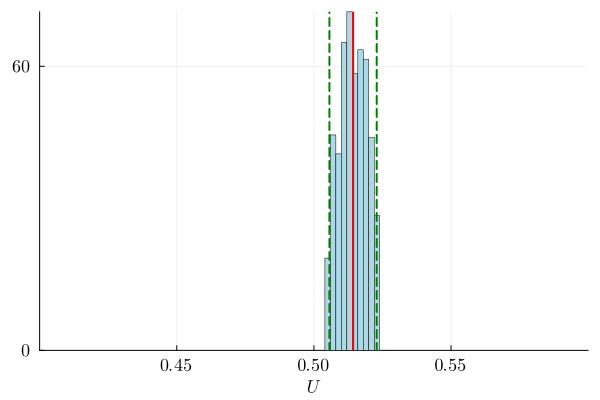

In [20]:
#dataU = smallU[idxs];
μU = mean(smallU);
ci_low, ci_high = quantile(smallU, [0.025, 0.975])  # 90% CI
b1=histogram(smallU,
    bins = 10,
    normalize = true,
    linewidth = 0.5,
    color = :lightblue,
    xlabel = L"U",
label=false)
b1 = vline!([μU], label = false, color = :red, linewidth = 2)
b1 = vline!([ci_low, ci_high], label = false, color = :green, linestyle = :dash, linewidth = 2)
b1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
b1=plot!(xlims=(0.40,0.60))
b1=plot!(xticks=([0.45,0.5,0.55],[L"0.45", L"0.50",L"0.55"]))
b1=plot!(yticks=([0,60],[L"0", L"60"]))
display(b1)

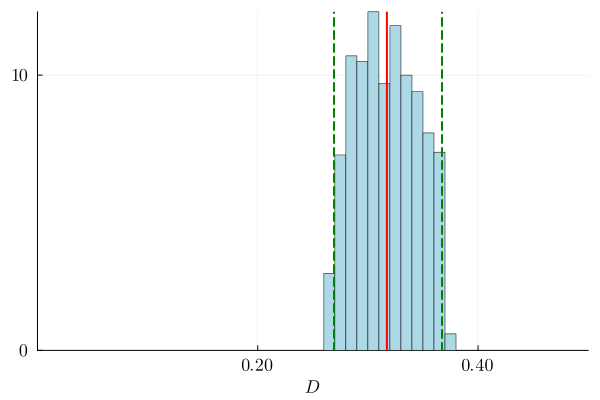

In [22]:
#dataD =  Dsampled[idxs];
μD = mean(smallD);
ci_low, ci_high = quantile(smallD, [0.025, 0.975])  # 90% CI
b2=histogram(smallD,
    bins = 10,
    normalize = true,
    linewidth = 0.5,
    color = :lightblue,
    xlabel = L"D",
label=false)
b2 = vline!([μD], label = false, color = :red, linewidth = 2)
b2 = vline!([ci_low, ci_high], label = false, color = :green, linestyle = :dash, linewidth = 2)
b2=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
b2=plot!(xlims=(0.0,0.50))
b2=plot!(xticks=([0.20,0.40],[L"0.20",L"0.40"]))
b2=plot!(yticks=([0,10],[L"0", L"10"]))
display(b2)

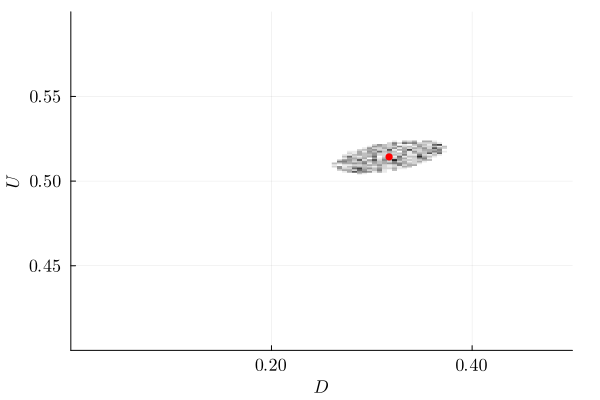

In [26]:
hh = fit(Histogram, (smallD, smallU), nbins=(20,20));
c1 = heatmap(hh.edges[1], hh.edges[2], hh.weights',
             xlabel=L"D", ylabel=L"U",
            colorbar_title="Frequency",colorbar=false,c=reverse(collect(Gray.(LinRange(0, 1, 256)))))
c1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
c1=plot!(xlims=(0.0,0.50),ylims=(0.40,0.60))
c1=plot!(xticks=([0.20,0.40],[L"0.20",L"0.40"]))
c1=plot!(yticks=([0.45,0.5,0.55],[L"0.45", L"0.50",L"0.55"]))
c1=scatter!([μD],[μU],ms=4,mc=:red,msc=:auto,legend=false)

In [27]:
blank =plot([], xlim=(0, 1), ylim=(0, 1),
     xlabel="", ylabel="", title="",
     xticks=false, yticks=false,
     legend=false, grid=false,
     framestyle=:none);

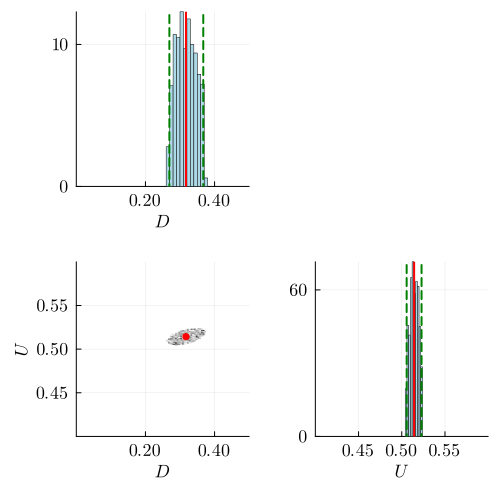

In [28]:
e1=plot(b2,blank,c1,b1,layout=(2,2),size = (500, 500)) #Plot ABC histograms Figure 2(b)

In [29]:
savefig(e1,"ABC_Rejection_CL.pdf")

"C:\\Users\\matth\\Dropbox\\RW_Inference_Identifiability_Prediction\\TidyCodes4GitHub\\ABC_Rejection_CL.pdf"

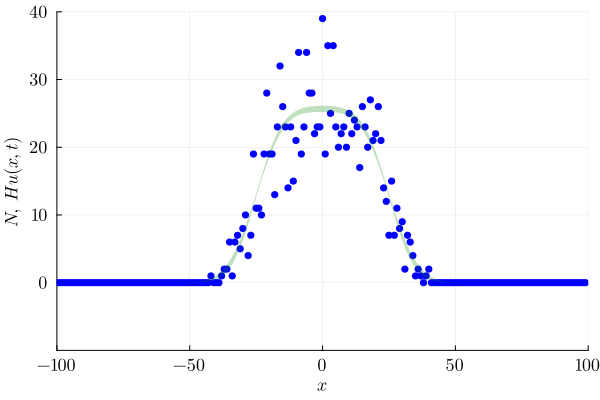

In [30]:
M=1000
lower=2*LY*ones(length(xxloc))
upper=zeros(length(xxloc))

for i in 1:M
C(x)=LY*smallU[i]*(erf((h-x)/sqrt(4*smallD[i]*T))+erf((h+x)/sqrt(4*smallD[i]*T)))/2;

    for j in 1:length(xxloc)
        if C(xxloc[j]) < lower[j] 
            lower[j] = C(xxloc[j])
        end
       
        if C(xxloc[j])> upper[j] 
            upper[j] = C(xxloc[j])
        end
       
    end

end
C(x)=LY*μU*(erf((h-x)/sqrt(4*μD*T))+erf((h+x)/sqrt(4*μD*T)))/2;
r1=scatter(xxloc,data,mc=:blue,label=false,msc=:auto, xlabel=L"x", ylabel =L"N, \; H u(x,t)")
r1=plot!(xxloc,lower,lw=0,fillrange=upper,fillalpha=0.25,color=:green,label=false,xlims=(-100,100),ylims=(-10,40))
r1=plot!(xticks = ([-100,-50,0,50,100],  [L"-100", L"-50", L"0", L"50", L"100"]))
r1=plot!(yticks = ([0,10,20,30,40],[L"0", L"10", L"20", L"30", L"40"]))
r1=plot!(xguidefontsize=12, yguidefontsize=12,xtickfontsize=12, ytickfontsize=12)
display(r1)
#savefig(r1,"ABC_Prediction.pdf") Figure 2(c) - prediction interval from ABC rejection without the noise